In [35]:
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#file_path = 'plr_smpl_attempts.csv'
#print(os.path.exists(file_path))

In [5]:
os.getcwd()

'/home/user/work/DABI/Task2'

In [6]:
os.listdir('/home/user/work/DABI/Task2')

['Untitled.ipynb', 'plr_smpl_attempts .csv', 'Match', '.ipynb_checkpoints']

In [3]:
# загрузка данных
df = pd.read_csv(
    '/home/user/work/DABI/Task2/plr_smpl_attempts.csv',sep=";")
#print(df.head())

                              uid  action  level   event_time
0  elljQ2EySG03MDU0MTE3MTAyMTE3MA  failed    113  1,51209E+12
1  elljQ2EySG03MDU0MTE3MTAyMTE3MA  failed    113  1,51209E+12
2  elljQ2EySG03MDU0MTE3MTAyMTE3MA  failed    113  1,51209E+12
3  elljQ2EySG03MDU0MTE3MTAyMTE3MA  failed    113  1,51209E+12
4  elljQ2EySG03MDU0MTE3MTAyMTE3MA  failed    113  1,51209E+12


In [4]:
# змена разделителя разрядов
df['event_time']=df['event_time'].str.replace(',', '.').astype(float)
df.head()

,uid,action,level,event_time
0,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1.512090e+12
1,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1.512090e+12
2,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1.512090e+12
3,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1.512090e+12
4,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1.512090e+12


In [5]:
# Преобразование UNIX даты в формат дата-время
df['event_time']=pd.to_datetime(df['event_time'], unit='ms')

In [7]:
df.head(25)

,uid,action,level,event_time
0,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,2017-12-01 01:00:00
1,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,2017-12-01 01:00:00
2,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,2017-12-01 01:00:00
3,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,2017-12-01 01:00:00
4,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,2017-12-01 01:00:00
5,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,2017-12-01 14:53:20
6,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,2017-12-01 14:53:20
7,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,2017-12-01 14:53:20
8,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,2017-12-01 14:53:20
9,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,2017-12-01 01:00:00


In [8]:
# посчет уникальныных дат
#unique_event_times = df['event_time'].nunique()
#print(unique_event_times)

9


In [10]:
# поиск дубликатов
duplicated_rows = df.duplicated().sum()
print(duplicated_rows)

12003


In [19]:
# # удаление дубликатов
df_unique = df.drop_duplicates(keep='first') 

In [525]:
# определении локации пользоватлей
# выделили час активности пользователей
df_unique['hour] = df_unique['event_time'].dt.hour
df_unique.head()

,uid,action,level,event_time,hour
0,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,2017-12-01 01:00:00,1
5,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,2017-12-01 14:53:20,14
12,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,2017-12-01 17:40:00,17
15,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,114,2017-12-01 20:26:40,20
18,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,114,2017-12-01 17:40:00,17


hour
1      685
3      879
6      936
9      918
12     988
14    1063
17    1014
20     870
23     643
dtype: int64


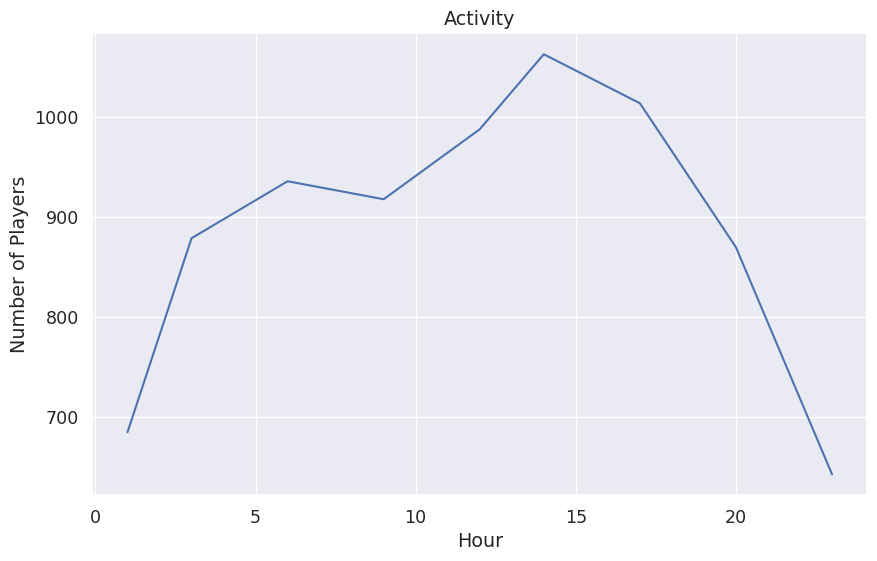

In [531]:
# опрделили количество пользователей в тачении каждого час --- здесь еще учитываются читтеры - это правильно они тоже игроки)
hourly_distribution = df_unique.groupby('hour').size()
print(hourly_distribution)
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_distribution.index, y=hourly_distribution.values)
plt.xlabel('Hour')
plt.ylabel('Number of Players')
plt.title('Activity')
plt.show()
# дальнейший анализ с помощью подбора часового пояса  - здесь https://dayspedia.com/time-zone-map/21600/

In [23]:
#создали новый дата сет - uid, level & number attempts, completed
grouped_df = df_unique.groupby(['uid', 'level']) #сгруппировали по id и  level
new_df = grouped_df.agg(
    attempts=('level', 'count'),  
    completed=('action', 'min')
).reset_index() 

In [526]:
new_df.head()

,uid,level,attempts,completed,time_spent,level_diff
0,M0duNVNHSlMxMjA0MzI3MTAyMDE0MA,164,2,completed,0 days 00:00:00,NaN
1,M0duNVNHSlMxMjA0MzI3MTAyMDE0MA,165,1,failed,0 days 00:00:00,1.0
2,M0pvNU42VmoxMjYyNDE3MTAyOTA2Mg,126,2,completed,0 days 00:00:00,NaN
3,M0pvNU42VmoxMjYyNDE3MTAyOTA2Mg,127,3,completed,0 days 02:46:40,1.0
4,M0pvNU42VmoxMjYyNDE3MTAyOTA2Mg,128,2,completed,0 days 00:00:00,1.0


In [27]:
#Выявление читеров  на основе анализа и пропущенных уровней игры
new_df = new_df.sort_values(by=['uid', 'level'])  
new_df['level_diff'] = new_df.groupby('uid')['level'].diff()
missed_levels = new_df[new_df['level_diff'] > 1]
#print("Пропущенные уровни:")
#print(missed_levels)
#missed_levels.info()
# удаление игроков с пропущенными уровнями  -удаляем ВСЕХ!!!!кто попал в читерство
df = new_df[~new_df['uid'].isin(missed_levels['uid'])]

,uid,level,attempts,completed,time_spent
0,M0duNVNHSlMxMjA0MzI3MTAyMDE0MA,164,2,completed,0 days 00:00:00
1,M0duNVNHSlMxMjA0MzI3MTAyMDE0MA,165,1,failed,0 days 00:00:00
2,M0pvNU42VmoxMjYyNDE3MTAyOTA2Mg,126,2,completed,0 days 00:00:00
3,M0pvNU42VmoxMjYyNDE3MTAyOTA2Mg,127,3,completed,0 days 02:46:40
4,M0pvNU42VmoxMjYyNDE3MTAyOTA2Mg,128,2,completed,0 days 00:00:00
...,...,...,...,...,...
95,MU9Ga2NzN24wMTMzMjI3MTAyMDExMA,85,5,completed,0 days 11:06:40
96,MU9Ga2NzN24wMTMzMjI3MTAyMDExMA,86,2,completed,0 days 00:00:00
97,MU9Ga2NzN24wMTMzMjI3MTAyMDExMA,87,2,failed,0 days 02:46:40
98,MUJ0bmpmNUwyNDQxNDE3MTAyMDE4MQ,113,1,failed,0 days 00:00:00


In [132]:
## определение читеров на основе outliers! Вариант не рабочий! Делала разные варианты ; (mean+-std & 5-Tukey)
#xmean = filter_df['attempts'].mean() 
#xstd = filter_df['attempts'].std() 
#xmax = xmean + 2*xstd 
#cheaters = filter_df[(filter_df['attempts'] < xmin) | (filter_df['attempts'] > xmax)] 
#print(xmean, xstd, xmin, xmax) 
#cheaters.info()

1.9844833278309673 0.8806354130115097 0.22321250180794783 3.7457541538539867
<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, 2099 to 277
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   uid         190 non-null    object         
 1   level       190 non-null    int64          
 2   attempts    190 non-null    int64          
 3   completed   190 non-null    object         
 4   time_spent  190 non-null    timedelta64[ns]
dtypes: int64(2), object(2), timedelta64[ns](1)
memory usage: 8.9+ KB


In [185]:
# удаление игроков с пропущенными уровнями нвдо удалять всех этих игроков!!!! -удаляем ВСЕХ!!!!кто попал в читерство
df = new_df[~new_df['uid'].isin(missed_levels['uid'])]

In [239]:
# Проверка количества уровней уникальных - проверяла 
#unique_count = df['level'].nunique()
#print(unique_count)

396


In [240]:
# Создание нового датафрейма  по уровнм и метрикам для каждого уровня
# Рассчитываем метрики:
   
# общее количество попыток для уровня
attempts_count = df.groupby('level')['attempts'].sum()
    
#число пользователей побывавшиз на уровне 
user_count = df.groupby('level')['uid'].count() 

# число пользователей прошедших уровень - Passed the level
pass_level = df.groupby('level')['completed'].apply(lambda x: (x == 'completed').sum())  

# число пользователей непрошедших уровень --- Remaining on the level 
rem_level = df.groupby('level')['completed'].apply(lambda x: (x == 'failed').sum())  

#сложность уровня: число удачных попыток прохождения уровней/общее число попыток
complex_level = df.groupby('level')['completed'].apply(lambda x: (x == 'completed').sum())/df.groupby('level')['attempts'].sum()

# создание нового DataFrame
metrics = pd.DataFrame({
    'level': df['level'].unique(),            # Уникальные значения уровня из исходного датафрейма
    'user_count': user_count.reindex(df['level'].unique(), fill_value=0).values,      # Количество пользователей побывавших на уровне
    'pass_level': pass_level.reindex(df['level'].unique(), fill_value=0).values,  # число пользователей прошедших уровеньPassed the level
    'rem_level': rem_level.reindex(df['level'].unique(), fill_value=0).values,  # число пользователей непрошедших уровень --- Remaining on the level 
    #'percent_pass': perсent_pass.reindex(df['level'].unique(), fill_value=0).values, #процент пользователей прохождения уровня
    'attempts_count': attempts_count.reindex(df['level'].unique(),fill_value=0).values,
    'complex_level': complex_level.reindex(df['level'].unique(), fill_value=0).values # 
})

# процент пользователей прохождения уровня
metrics['percent_pass'] = metrics['pass_level'] / metrics['user_count'] * 100 #
metrics.head()


,level,user_count,pass_level,rem_level,attempts_count,complex_level,percent_pass
0,164,15,8,7,29,0.275862,53.333333
1,165,12,7,5,22,0.318182,58.333333
2,126,14,13,1,27,0.481481,92.857143
3,127,18,15,3,45,0.333333,83.333333
4,128,25,16,9,51,0.313725,64.000000


In [538]:
#!pip install scipy #для построения дендограммы

Defaulting to user installation because normal site-packages is not writeable
  Using cached scipy-1.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (41.2 MB)


In [539]:
#import scipy.cluster.hierarchy as shc # иерархические методы кластеризации
#from scipy.cluster.hierarchy import fcluster

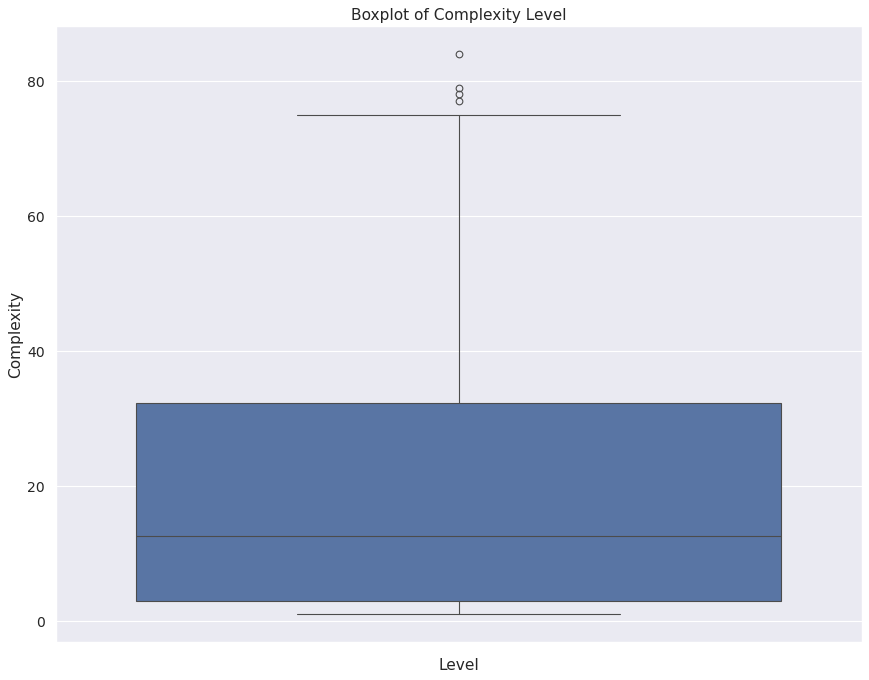

In [560]:
plt.figure(figsize=(13,10), dpi= 80)
#sns.violinplot(x='complex_cat', y='complex_level', data=metrics, density_norm='width', inner='quartile')
#plt.title('Violin Plot of Highway Mileage by Vehicle Class', fontsize=22)
#plt.show()
sns.boxplot(y='attempts_count', data=metrics)
plt.xlabel('Level')
plt.ylabel('Complexity')
plt.title('Boxplot of Complexity Level')
plt.show()

In [570]:
# загрузка библиотеки для стандартизации
#from sklearn.preprocessing import StandardScaler
#!pip install sklearn.preprocessing

In [573]:
# стандартизируем данные
numeric_columns = ['user_count', 'pass_level', 'rem_level', 'attempts_count', 'complex_level', 'percent_pass']

# Инициализация StandardScaler
scaler = StandardScaler()

# Применение стандартизации к выбранным столбцам
metrics_scaled = pd.DataFrame(scaler.fit_transform(metrics[numeric_columns]), columns=numeric_columns)

# Если вы хотите сохранить другие столбцы (например, 'level', 'complex_cat')
# в объединенном датафрейме, добавьте их обратно:
metrics_scaled = pd.concat([metrics[['level', 'complex_cat']], metrics_scaled], axis=1)

print(metrics_scaled.head())

   level complex_cat  user_count  pass_level  rem_level  attempts_count  \
0    164      Master    0.406946    0.061446   0.833953        0.458964   
1    165      Expert    0.120541   -0.076807   0.397120        0.103786   
2    126        Hard    0.311477    0.752713  -0.476544        0.357484   
3    127      Expert    0.693351    1.029220  -0.039712        1.270799   
4    128      Expert    1.361629    1.167474   1.270785        1.575237   

   complex_level  percent_pass  
0      -0.690614     -0.839706  
1      -0.491142     -0.651546  
2       0.278565      0.647652  
3      -0.419726      0.289253  
4      -0.512147     -0.438298  


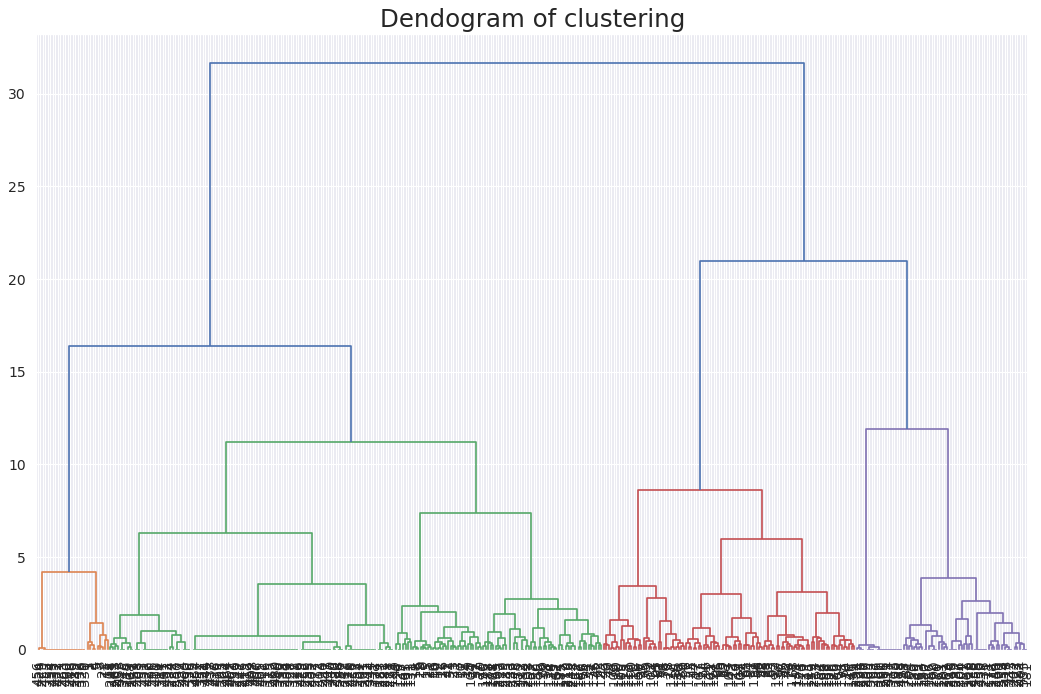

     level  cluster
0      164        3
1      165        4
2      126        2
3      127        3
4      128        3
..     ...      ...
391    452        2
392    453        1
393    454        2
394    225        2
395    229        1

[396 rows x 2 columns]


In [615]:
# Кластерный анализ - агломертивные методы
# Данная задача требуебт более тцательного анализа и выполнена как иллюстрация альтернативного подхода к классификации

# Вычисление матрицы связей

D = shc.linkage(metrics_scaled[['complex_level', 'percent_pass', 'attempts_count']], method='ward')

plt.figure(figsize=(16, 10), dpi= 80)  
plt.title("Dendogram of clustering", fontsize=22)  
dend = shc.dendrogram(D, labels=metrics['level'].values, color_threshold=12)  
plt.xticks(fontsize=12)
plt.show()

# Разбиение дендрограммы на кластеры
threshold = 14 
clusters = fcluster(D, threshold, criterion='distance')

metrics1=metrics
metrics1['cluster'] = clusters

print(metrics1[['level', 'cluster']])



In [532]:
# определение описательных статистик для каждого уровня
metrics[['attempts_count','pass_level','rem_level','complex_level', 'percent_pass'] ].describe()

,attempts_count,pass_level,rem_level,complex_level,percent_pass
count,396.000000,396.000000,396.000000,396.000000,396.000000
mean,19.954545,7.555556,3.181818,0.422382,75.646973
std,19.733361,7.242242,4.584208,0.212427,26.606780
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000,0.285714,57.142857
50%,12.500000,4.000000,1.000000,0.400000,82.213439
75%,32.250000,13.000000,4.000000,0.500000,100.000000
max,84.000000,27.000000,29.000000,1.000000,100.000000


Text(0, 0.5, 'Percent_pass')

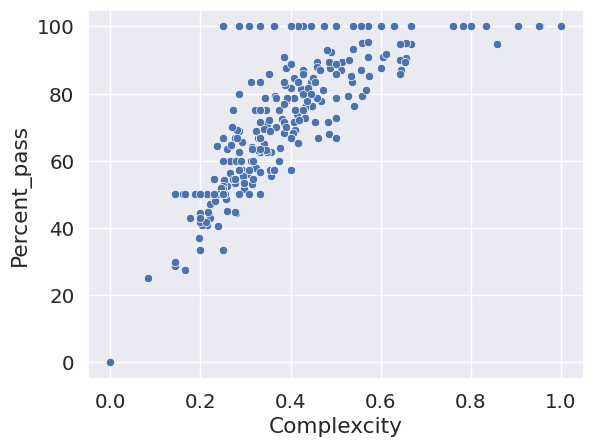

In [265]:
# необязательная диаграмма рассеяния - но хорошо иллюстрирует зависимость двух метрик
sns.set(font_scale=1.3)
sns.scatterplot(
    x='complex_level', 
    y='percent_pass', 
    data=metrics)
plt.xlabel(
    'Complexcity')
plt.ylabel(
    'Percent_pass')

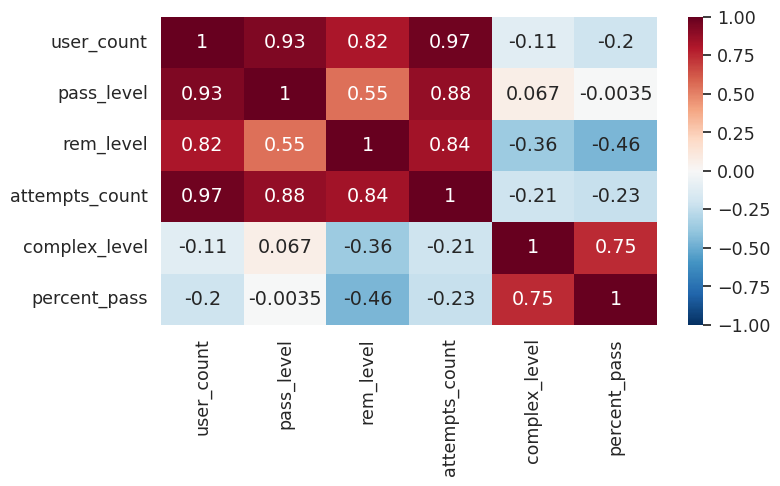

In [533]:
#  Анализ зависимости метрик с помощью correlation &heat map
#metrics.corr()
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    metrics[['user_count','pass_level','rem_level','attempts_count','complex_level','percent_pass']].corr(),
    cmap='RdBu_r', # задаёт цветовую схему
    annot=True, # рисует значения внутри ячеек
    vmin=-1, vmax=1); # указывает начало цветовых кодов от -1 до 1.

(array([ 24., 100., 125., 104.,  17.,  26.]),
 array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
        0.83333333, 1.        ]),
 <BarContainer object of 6 artists>)

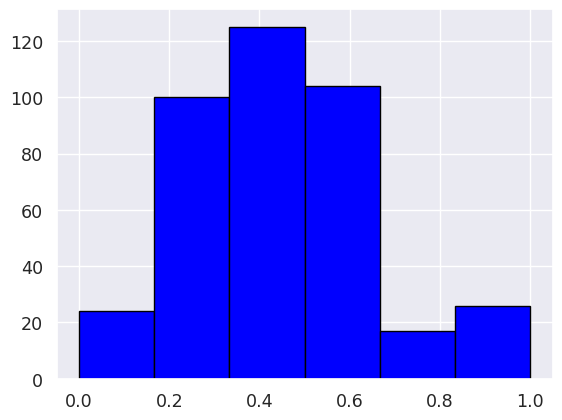

In [529]:
# гистограмма рапсределения метрики "Уровень сложности"
plt.hist(metrics['complex_level'], color = 'blue', edgecolor = 'black',
         bins = 6)
# иллюстрирует число уровней по уровням сложности

In [448]:
# Разделение на категории сложности на основе квантилей Выделили 5 категорий сложности. 

qmin = metrics['complex_level'].min()
#xmin = q25-1.5*(q75-q25)
q25 = metrics['complex_level'].quantile(0.25)
q50 = metrics['complex_level'].quantile(0.50)
q75 = metrics['complex_level'].quantile(0.75)
#80 = metrics['complex_level'].quantile(0.80)

xmax = q75+1.5*(q75-q25)
qmax = metrics['complex_level'].max()

bins = [qmin,q25,q50,q75,xmax,qmax]
print(bins)
labels = ['Master','Expert','Hard','Medium','Easy']

metrics['complex_cat'] = pd.cut(metrics['complex_level'], bins=bins, labels=labels, include_lowest=True)

[0.0, 0.2857142857142857, 0.4, 0.5, 0.8214285714285714, 1.0]


In [449]:
#metrics.head(200)
print(metrics.groupby('complex_cat')['complex_cat'].count())

complex_cat
Master    100
Expert    102
Hard      116
Medium     52
Easy       26
Name: complex_cat, dtype: int64


/tmp/ipykernel_171851/3742633529.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(metrics.groupby('complex_cat')['complex_cat'].count())


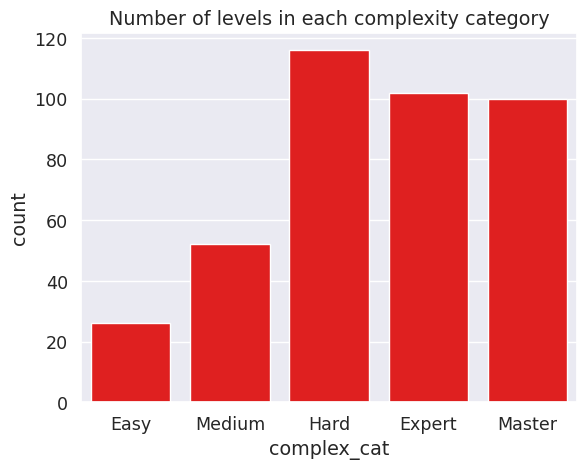

In [521]:
# сумма уровней по категориям сложности
sns.countplot(x='complex_cat', data=metrics,color='red')
plt.gca().invert_xaxis()  # изменение порядка следования
plt.title('Number of levels in each complexity category')
plt.show()

In [530]:
# описательные статистики по метрике complex_level для каждой категории
print(metrics.groupby('complex_cat', observed=True)['complex_level'].describe())

             count      mean       std       min       25%       50%  \
complex_cat                                                            
Master       100.0  0.191209  0.100564  0.000000  0.166667  0.234492   
Expert       102.0  0.346271  0.030393  0.290323  0.333333  0.333333   
Hard         116.0  0.476655  0.032767  0.406250  0.448804  0.500000   
Medium        52.0  0.616018  0.066223  0.512821  0.564706  0.608586   
Easy          26.0  0.980678  0.045746  0.833333  1.000000  1.000000   

                  75%       max  
complex_cat                      
Master       0.259259  0.285714  
Expert       0.367982  0.400000  
Hard         0.500000  0.500000  
Medium       0.666667  0.800000  
Easy         1.000000  1.000000  


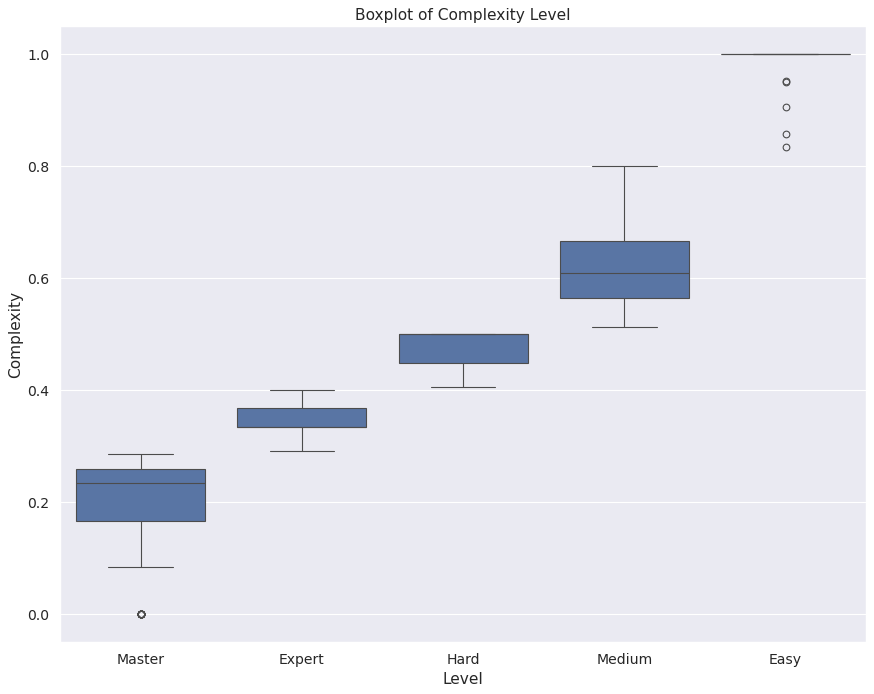

In [450]:
#Построение box&whisker для каждой категории сложности
#lt.figure(figsize=(10, 10))
plt.figure(figsize=(13,10), dpi= 80)
#sns.violinplot(x='complex_cat', y='complex_level', data=metrics, density_norm='width', inner='quartile')
#plt.title('Violin Plot of Highway Mileage by Vehicle Class', fontsize=22)
#plt.show()
sns.boxplot(x='complex_cat', y='complex_level', data=metrics)
plt.xlabel('Level')
plt.ylabel('Complexity')
plt.title('Boxplot of Complexity Level')
+plt.show()

In [451]:
# создали новый датафрейм - для категорий сложности
category = metrics.groupby ('complex_cat',observed=False).agg(
    user_count=('user_count', 'sum'),  
    pass_level=('pass_level', 'sum'),     
    rem_level=('rem_level', 'sum'),
    complex_level=('complex_level','mean')
).reset_index()

In [452]:
# Метрики для категорий сложностией
category.head()

,complex_cat,user_count,pass_level,rem_level,complex_level
0,Master,1185,586,599,0.191209
1,Expert,1318,881,437,0.346271
2,Hard,912,755,157,0.476655
3,Medium,705,639,66,0.616018
4,Easy,132,131,1,0.980678


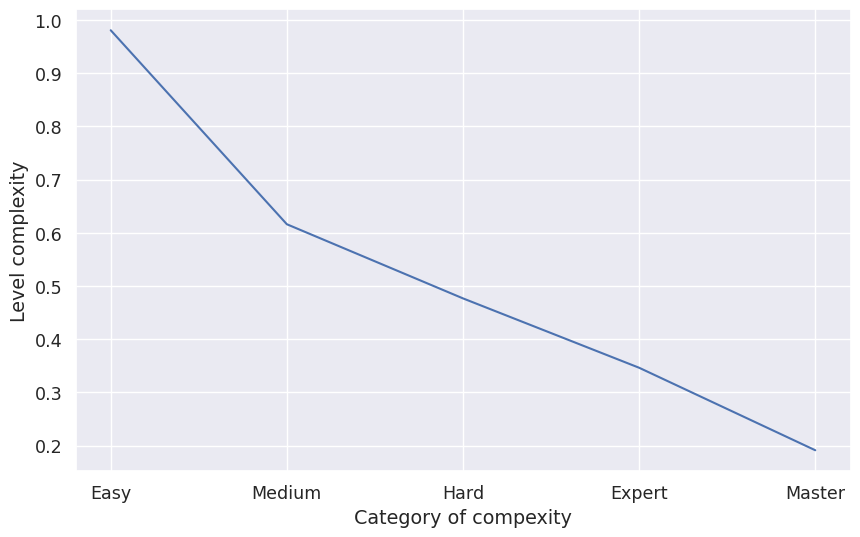

In [458]:
#график изменения метрики по категориям
plt.figure(figsize=(10, 6))
sns.lineplot(x=category['complex_cat'], y=category['complex_level'])
plt.gca().invert_xaxis()
plt.xlabel('Category of compexity')
plt.ylabel('Level complexity')
#plt.title('Level complexity')
plt.show()

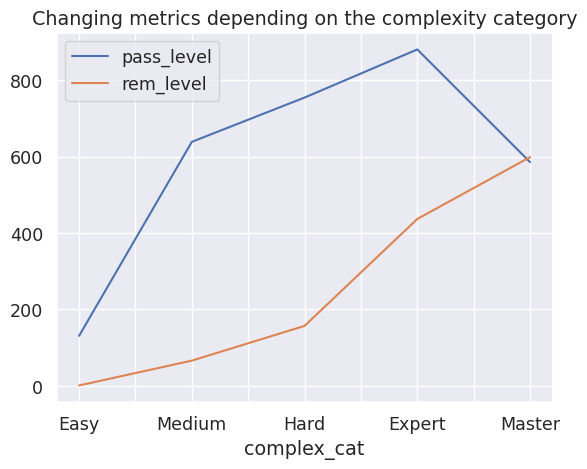

In [544]:
# диаграмма изменения метрик по категориям
category.plot(x='complex_cat', y=['pass_level', 'rem_level'], kind='line')
plt.title('Changing metrics depending on the complexity category')
plt.gca().invert_xaxis()
plt.show()

Text(0.5, 1.0, '% of passed users')

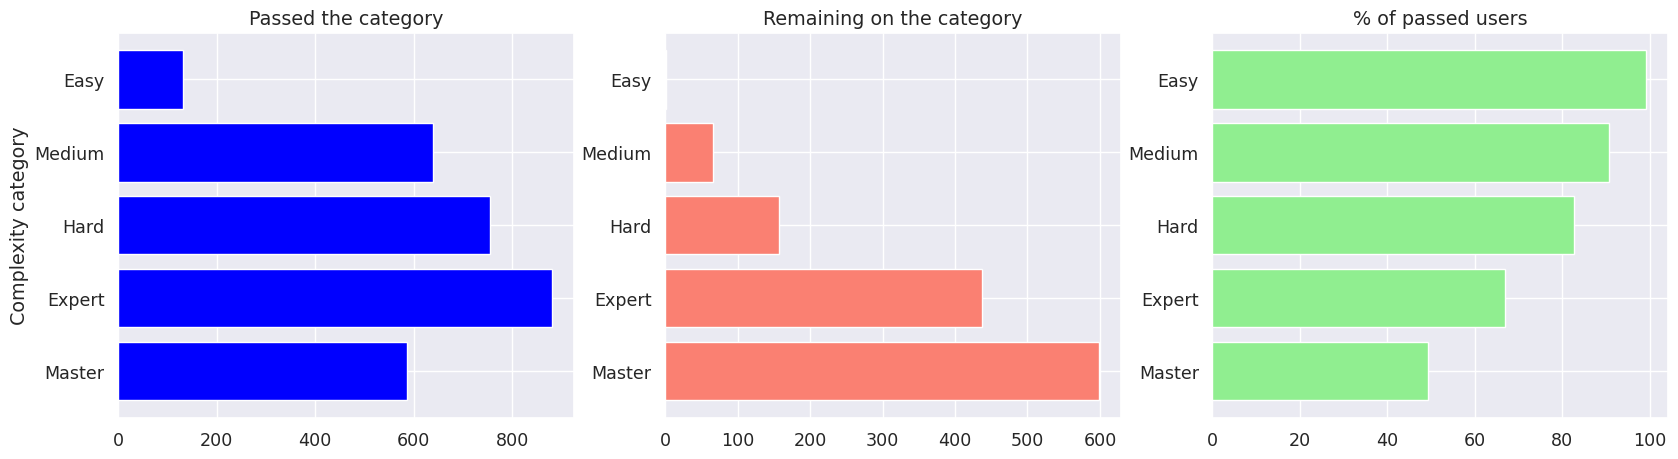

In [472]:
# Воронка прохождения уровней
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Построение первого барплота
axes[0].barh(category['complex_cat'], category['pass_level'], color='blue')
axes[0].set_title('Passed the category')
axes[0].set_ylabel('Complexity category')
#axes[0].set_xlabel('Passed the level')

# Построение второго барплота
axes[1].barh(category['complex_cat'],category['rem_level'], color='salmon')
axes[1].set_title('Remaining on the category')

#axes[1].set_ylabel('Categories')
#axes[1].set_xlabel('Remaining on the level')

x = category['pass_level']/category['user_count']*100
axes[2].barh(category['complex_cat'],x, color='lightgreen')
axes[2].set_title('% of passed users') 

#axes[2].set_xlabel('level complexity')
#axes[2].set_ylabel('Categories')

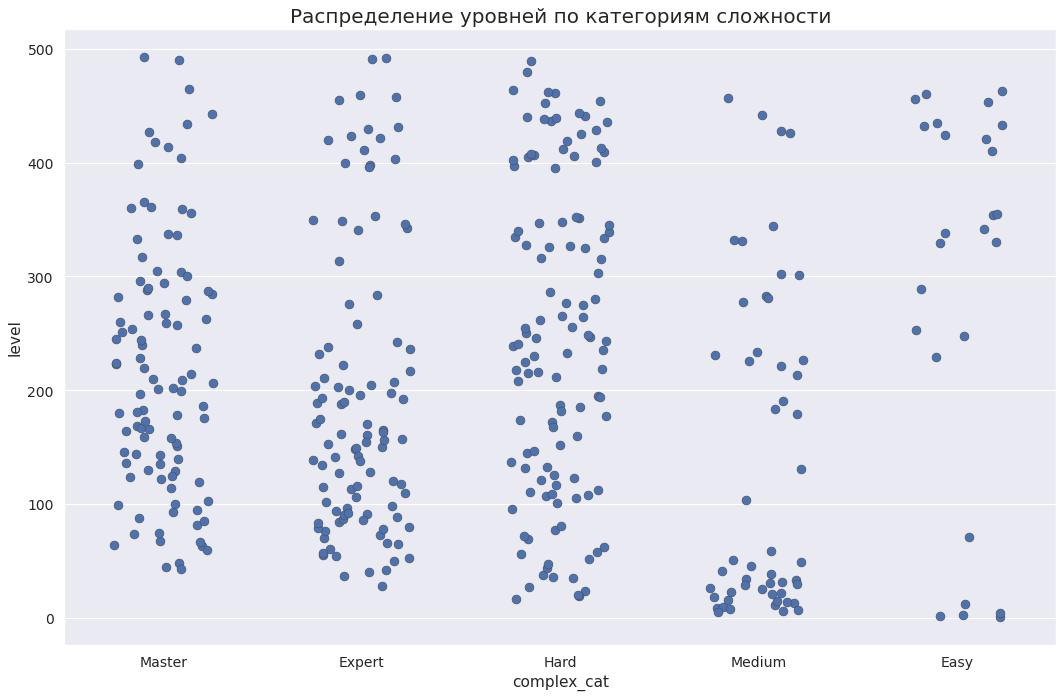

In [618]:
# Распределение уровней по категориям

fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(y=metrics['level'], x=metrics['complex_cat'], jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Распределение уровней по категориям сложности', fontsize=18)
plt.show()

In [545]:
 #самые сложные уровни

,level,user_count,pass_level,rem_level,attempts_count,complex_level,percent_pass,complex_cat
0,164,15,8,7,29,0.275862,53.333333,Master
1,165,12,7,5,22,0.318182,58.333333,Expert
2,126,14,13,1,27,0.481481,92.857143,Hard
3,127,18,15,3,45,0.333333,83.333333,Expert
4,128,25,16,9,51,0.313725,64.000000,Expert


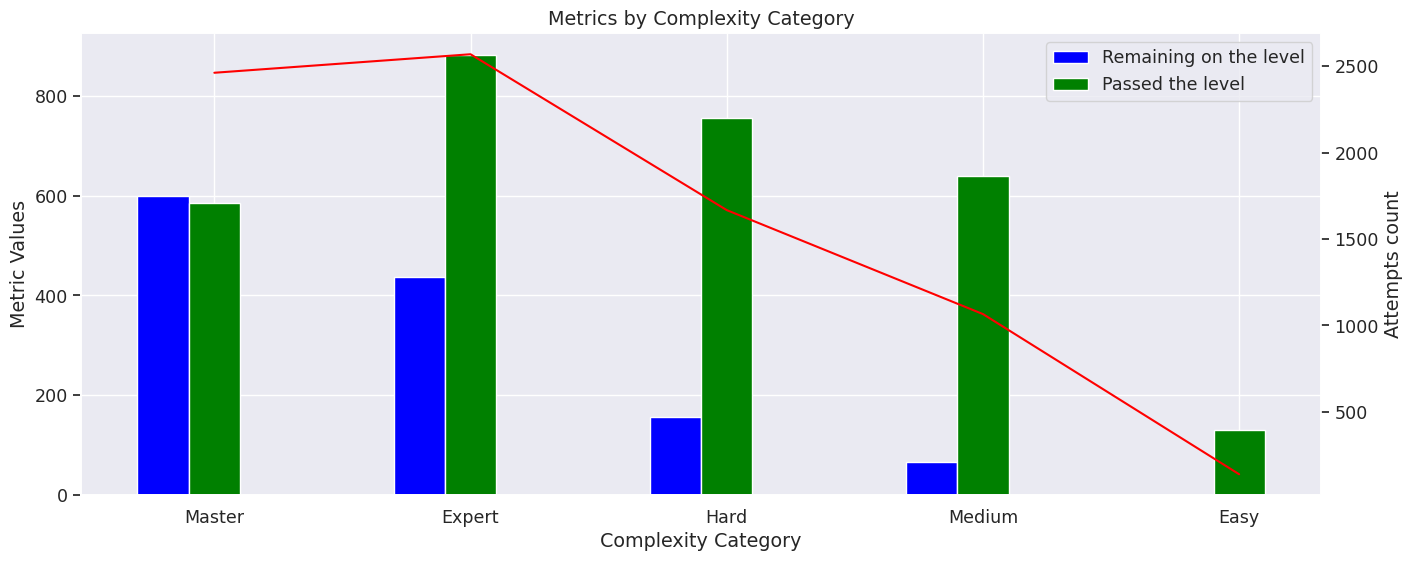

In [620]:
# BarPlot по мтерикам для категорий сложности.
# Использование двух осей обусловлено значительными различиями в диапазонах значений метрик
categories = metrics['complex_cat'].unique()
num_categories = len(categories)

# Определение позиций для каждой категории
x = np.arange(num_categories)

# Ширина столбцов
width = 0.2

fig, ax = plt.subplots(figsize=(16, 6))

bar1 = ax.bar(x - width, metrics.groupby('complex_cat',observed=True)['rem_level'].sum(), width, label='Remaining on the level', color='blue')
bar2 = ax.bar(x, metrics.groupby('complex_cat',observed=True)['pass_level'].sum(), width, label='Passed the level', color='green')
ax1 = ax.twinx()
ax1.plot(x, metrics.groupby('complex_cat',observed=True)['attempts_count'].sum(), color='red')
#bar3 = ax1.bar(x + width, metrics.groupby('complex_cat',observed=True)['attempts_count'].sum(), width, label='Attempts Count', color='red')

ax.set_xlabel('Complexity Category')
ax.set_ylabel('Metric Values')
ax.set_title('Metrics by Complexity Category')
ax.set_xticks(x)
ax.set_xticklabels(categories)

ax1.set_xticks(x)
ax1.set_ylabel('Attempts count')

ax.legend()

plt.grid(False)

plt.show()